In [2]:
exec(open("./090120_autoencoderhelperfunctions.py").read())
new_v = pd.read_csv('/users/madke/documents/090820_aapecsdims4.csv', index_col = 0)

In [3]:
wvclean = pd.read_csv('/users/madke/030520_aapecsvecs.csv', index_col = 0)
data = pd.read_csv('/users/madke/documents/030520_aapecstxtbtemapid.csv', index_col = 0)

In [17]:
data

,BTEMA,pID,text
0,2017-01-25 13:22:34,8,have go work midnight
1,2017-01-26 13:47:47,8,police were called ex claiming wont allow tal...
2,2017-01-29 17:48:45,8,son is trying manipulate family members
3,2017-01-30 06:50:53,8,mom called wanted taken hospitalthen called b...
4,2017-01-31 08:30:27,8,garage manager failed mention anyone locks we...
...,...,...,...
7654,2018-12-05 21:28:02,407,inc pt
7655,2018-12-10 20:14:07,407,bestfriends mothers break
7656,2018-12-12 21:35:15,407,visited dad hes ass hounding havent done
7657,2018-12-13 10:00:50,407,mistimed reunion


In [4]:
data.merge(new_v, left_on = 'BTEMA', right_on = 'BTEMA', how = 'inner')

KeyError: Index(['pID'], dtype='object')

In [7]:
totals = pd.concat([wvclean,data], axis = 1)
totals = totals[totals.text != ' none']
result = totals.drop(['BTEMA', 'pID', 'text'], axis = 1)
x_train = result
x_train = x_train.astype('float32')

In [8]:
np.random.seed(1)
tf.compat.v1.random.set_random_seed(1)

activ_h = 'tanh'
KI_h = 'glorot_uniform' 

L1 = 175
L2 = 85
L3 = 12
L4 = 4

v_dim = 300
activ_v = 'tanh'
learn = 0.00005
opt = tf.optimizers.Adam(lr= learn, amsgrad = True)
loss_fctn = 'cosine_similarity'
en_name = str(L1) + '_' + str(L2) + '_' + str(L3) 

model = Sequential()
#encoder
model.add(Dense(L1, input_dim=v_dim, activation=activ_h, kernel_initializer=KI_h))
model.add(Dense(L2, input_dim=L1, activation=activ_h, kernel_initializer=KI_h))
model.add(Dense(L3, input_dim=L2, activation=activ_h, kernel_initializer=KI_h))
model.add(Dense(L4, input_dim=L3, activation=activ_h, kernel_initializer=KI_h))
model.add(Dense(L4, activation=activ_v, name = 'encoded'))

#decoder
model.add(Dense(L3, input_dim=L4, activation=activ_h, kernel_initializer=KI_h))
model.add(Dense(L2, input_dim=L3, activation=activ_h, kernel_initializer=KI_h))
model.add(Dense(L1, input_dim=L2, activation=activ_h, kernel_initializer=KI_h))
model.add(Dense(v_dim, input_dim=L1, activation=activ_h, kernel_initializer=KI_h))
model.add(Dense(v_dim, activation=activ_v, name = 'ypred'))


model.compile(loss=loss_fctn, optimizer=opt, metrics=['acc', 'mae', 'msle', 'mse'])

In [9]:
history = model.fit(x_train, x_train,
          batch_size=50,
          epochs=1500, validation_split = 0.2)

Epoch 1/1500
122/122 [==============================] - 1s 10ms/step - loss: -0.5053 - acc: 0.8452 - mae: 0.1169 - msle: 0.0086 - mse: 0.0306 - val_loss: -0.7116 - val_acc: 0.9619 - val_mae: 0.1120 - val_msle: 0.0079 - val_mse: 0.0262
Epoch 2/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.7316 - acc: 0.9724 - mae: 0.1110 - msle: 0.0078 - mse: 0.0258 - val_loss: -0.7199 - val_acc: 0.9619 - val_mae: 0.1112 - val_msle: 0.0078 - val_mse: 0.0256
Epoch 3/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.7410 - acc: 0.9724 - mae: 0.1102 - msle: 0.0077 - mse: 0.0255 - val_loss: -0.7309 - val_acc: 0.9632 - val_mae: 0.1104 - val_msle: 0.0076 - val_mse: 0.0254
Epoch 4/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.7525 - acc: 0.9724 - mae: 0.1093 - msle: 0.0076 - mse: 0.0252 - val_loss: -0.7389 - val_acc: 0.9632 - val_mae: 0.1102 - val_msle: 0.0076 - val_mse: 0.0253
Epoch 5/1500
122/122 [==============================] - 1s 7ms/

Epoch 36/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.7961 - acc: 0.9730 - mae: 0.1135 - msle: 0.0089 - mse: 0.0297 - val_loss: -0.7838 - val_acc: 0.9625 - val_mae: 0.1136 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 37/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.7962 - acc: 0.9732 - mae: 0.1135 - msle: 0.0089 - mse: 0.0297 - val_loss: -0.7835 - val_acc: 0.9632 - val_mae: 0.1137 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 38/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.7962 - acc: 0.9729 - mae: 0.1135 - msle: 0.0089 - mse: 0.0297 - val_loss: -0.7834 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 39/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.7963 - acc: 0.9732 - mae: 0.1135 - msle: 0.0089 - mse: 0.0297 - val_loss: -0.7837 - val_acc: 0.9625 - val_mae: 0.1136 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 40/1500
122/122 [==============================] - 1s 

Epoch 71/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.7986 - acc: 0.9735 - mae: 0.1134 - msle: 0.0089 - mse: 0.0297 - val_loss: -0.7870 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 72/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.7987 - acc: 0.9735 - mae: 0.1134 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.7872 - val_acc: 0.9625 - val_mae: 0.1137 - val_msle: 0.0089 - val_mse: 0.0295
Epoch 73/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.7989 - acc: 0.9739 - mae: 0.1134 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.7873 - val_acc: 0.9619 - val_mae: 0.1137 - val_msle: 0.0088 - val_mse: 0.0295
Epoch 74/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.7990 - acc: 0.9737 - mae: 0.1135 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.7876 - val_acc: 0.9625 - val_mae: 0.1138 - val_msle: 0.0089 - val_mse: 0.0295
Epoch 75/1500
122/122 [==============================] - 1s 

Epoch 106/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8026 - acc: 0.9732 - mae: 0.1137 - msle: 0.0090 - mse: 0.0301 - val_loss: -0.7908 - val_acc: 0.9639 - val_mae: 0.1140 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 107/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8026 - acc: 0.9732 - mae: 0.1137 - msle: 0.0090 - mse: 0.0301 - val_loss: -0.7910 - val_acc: 0.9639 - val_mae: 0.1140 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 108/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8027 - acc: 0.9732 - mae: 0.1136 - msle: 0.0090 - mse: 0.0301 - val_loss: -0.7908 - val_acc: 0.9632 - val_mae: 0.1140 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 109/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8027 - acc: 0.9732 - mae: 0.1136 - msle: 0.0090 - mse: 0.0301 - val_loss: -0.7910 - val_acc: 0.9632 - val_mae: 0.1139 - val_msle: 0.0090 - val_mse: 0.0298
Epoch 110/1500
122/122 [==============================] 

Epoch 141/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8040 - acc: 0.9730 - mae: 0.1133 - msle: 0.0089 - mse: 0.0299 - val_loss: -0.7924 - val_acc: 0.9632 - val_mae: 0.1137 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 142/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8041 - acc: 0.9730 - mae: 0.1133 - msle: 0.0089 - mse: 0.0299 - val_loss: -0.7923 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 143/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8041 - acc: 0.9730 - mae: 0.1133 - msle: 0.0089 - mse: 0.0299 - val_loss: -0.7923 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 144/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8041 - acc: 0.9730 - mae: 0.1133 - msle: 0.0089 - mse: 0.0299 - val_loss: -0.7924 - val_acc: 0.9632 - val_mae: 0.1135 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 145/1500
122/122 [==============================] 

Epoch 176/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8048 - acc: 0.9729 - mae: 0.1128 - msle: 0.0088 - mse: 0.0295 - val_loss: -0.7930 - val_acc: 0.9632 - val_mae: 0.1131 - val_msle: 0.0088 - val_mse: 0.0292
Epoch 177/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8048 - acc: 0.9730 - mae: 0.1128 - msle: 0.0088 - mse: 0.0295 - val_loss: -0.7929 - val_acc: 0.9632 - val_mae: 0.1131 - val_msle: 0.0088 - val_mse: 0.0292
Epoch 178/1500
122/122 [==============================] - ETA: 0s - loss: -0.8052 - acc: 0.9732 - mae: 0.1127 - msle: 0.0088 - mse: 0.029 - 1s 7ms/step - loss: -0.8048 - acc: 0.9729 - mae: 0.1128 - msle: 0.0088 - mse: 0.0295 - val_loss: -0.7927 - val_acc: 0.9632 - val_mae: 0.1131 - val_msle: 0.0088 - val_mse: 0.0292
Epoch 179/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8047 - acc: 0.9726 - mae: 0.1128 - msle: 0.0088 - mse: 0.0295 - val_loss: -0.7930 - val_acc: 0.9632 - val_mae: 0.1132 - val_msle:

122/122 [==============================] - 1s 6ms/step - loss: -0.8053 - acc: 0.9727 - mae: 0.1125 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7933 - val_acc: 0.9632 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 211/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8053 - acc: 0.9727 - mae: 0.1125 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.7931 - val_acc: 0.9632 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 212/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8052 - acc: 0.9726 - mae: 0.1125 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.7934 - val_acc: 0.9632 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 213/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8053 - acc: 0.9726 - mae: 0.1125 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.7932 - val_acc: 0.9632 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 214/1500
122/122 [==============================] - 1s 7ms/step -

122/122 [==============================] - 1s 7ms/step - loss: -0.8056 - acc: 0.9727 - mae: 0.1123 - msle: 0.0087 - mse: 0.0291 - val_loss: -0.7936 - val_acc: 0.9632 - val_mae: 0.1127 - val_msle: 0.0086 - val_mse: 0.0288
Epoch 245/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8057 - acc: 0.9726 - mae: 0.1122 - msle: 0.0087 - mse: 0.0291 - val_loss: -0.7937 - val_acc: 0.9632 - val_mae: 0.1126 - val_msle: 0.0086 - val_mse: 0.0288
Epoch 246/1500
122/122 [==============================] - 1s 5ms/step - loss: -0.8057 - acc: 0.9726 - mae: 0.1122 - msle: 0.0087 - mse: 0.0291 - val_loss: -0.7937 - val_acc: 0.9639 - val_mae: 0.1127 - val_msle: 0.0086 - val_mse: 0.0288
Epoch 247/1500
122/122 [==============================] - 1s 5ms/step - loss: -0.8057 - acc: 0.9726 - mae: 0.1122 - msle: 0.0087 - mse: 0.0291 - val_loss: -0.7936 - val_acc: 0.9639 - val_mae: 0.1126 - val_msle: 0.0086 - val_mse: 0.0288
Epoch 248/1500
122/122 [==============================] - 1s 6ms/step -

Epoch 279/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8061 - acc: 0.9730 - mae: 0.1121 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.7942 - val_acc: 0.9639 - val_mae: 0.1125 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 280/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8061 - acc: 0.9729 - mae: 0.1121 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.7941 - val_acc: 0.9639 - val_mae: 0.1124 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 281/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8061 - acc: 0.9732 - mae: 0.1121 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.7935 - val_acc: 0.9639 - val_mae: 0.1125 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 282/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8061 - acc: 0.9727 - mae: 0.1121 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.7943 - val_acc: 0.9639 - val_mae: 0.1125 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 283/1500
122/122 [==============================] 

Epoch 314/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8065 - acc: 0.9735 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7945 - val_acc: 0.9639 - val_mae: 0.1124 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 315/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8065 - acc: 0.9735 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7945 - val_acc: 0.9639 - val_mae: 0.1124 - val_msle: 0.0086 - val_mse: 0.0286
Epoch 316/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8065 - acc: 0.9735 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7946 - val_acc: 0.9639 - val_mae: 0.1124 - val_msle: 0.0086 - val_mse: 0.0286
Epoch 317/1500
122/122 [==============================] - 1s 5ms/step - loss: -0.8065 - acc: 0.9735 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7946 - val_acc: 0.9639 - val_mae: 0.1124 - val_msle: 0.0086 - val_mse: 0.0286
Epoch 318/1500
122/122 [==============================] 

Epoch 349/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8069 - acc: 0.9737 - mae: 0.1119 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7948 - val_acc: 0.9639 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0286
Epoch 350/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8069 - acc: 0.9739 - mae: 0.1119 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7946 - val_acc: 0.9645 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0286
Epoch 351/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8069 - acc: 0.9744 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7950 - val_acc: 0.9639 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0286
Epoch 352/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8069 - acc: 0.9739 - mae: 0.1119 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7948 - val_acc: 0.9639 - val_mae: 0.1123 - val_msle: 0.0085 - val_mse: 0.0286
Epoch 353/1500
122/122 [==============================] 

Epoch 384/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8073 - acc: 0.9742 - mae: 0.1119 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7952 - val_acc: 0.9639 - val_mae: 0.1123 - val_msle: 0.0085 - val_mse: 0.0286
Epoch 385/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8073 - acc: 0.9740 - mae: 0.1119 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7952 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 386/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8072 - acc: 0.9739 - mae: 0.1119 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7951 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 387/1500
122/122 [==============================] - 1s 10ms/step - loss: -0.8073 - acc: 0.9742 - mae: 0.1119 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7952 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 388/1500
122/122 [==============================]

Epoch 419/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8076 - acc: 0.9744 - mae: 0.1118 - msle: 0.0085 - mse: 0.0288 - val_loss: -0.7956 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 420/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8076 - acc: 0.9749 - mae: 0.1118 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7956 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 421/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8077 - acc: 0.9744 - mae: 0.1118 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7954 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 422/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8076 - acc: 0.9742 - mae: 0.1118 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7957 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 423/1500
122/122 [==============================] 

122/122 [==============================] - 1s 6ms/step - loss: -0.8080 - acc: 0.9742 - mae: 0.1119 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7959 - val_acc: 0.9645 - val_mae: 0.1123 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 454/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8080 - acc: 0.9742 - mae: 0.1119 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7959 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 455/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8080 - acc: 0.9742 - mae: 0.1119 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7958 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0285
Epoch 456/1500
122/122 [==============================] - 1s 11ms/step - loss: -0.8080 - acc: 0.9747 - mae: 0.1118 - msle: 0.0086 - mse: 0.0288 - val_loss: -0.7960 - val_acc: 0.9645 - val_mae: 0.1122 - val_msle: 0.0085 - val_mse: 0.0286
Epoch 457/1500
122/122 [==============================] - 1s 10ms/step

Epoch 488/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8086 - acc: 0.9742 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7960 - val_acc: 0.9645 - val_mae: 0.1124 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 489/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8085 - acc: 0.9742 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7967 - val_acc: 0.9645 - val_mae: 0.1124 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 490/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8086 - acc: 0.9744 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7963 - val_acc: 0.9645 - val_mae: 0.1124 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 491/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8086 - acc: 0.9742 - mae: 0.1120 - msle: 0.0086 - mse: 0.0289 - val_loss: -0.7965 - val_acc: 0.9645 - val_mae: 0.1125 - val_msle: 0.0086 - val_mse: 0.0287
Epoch 492/1500
122/122 [==============================] 

122/122 [==============================] - 1s 6ms/step - loss: -0.8093 - acc: 0.9740 - mae: 0.1122 - msle: 0.0087 - mse: 0.0291 - val_loss: -0.7970 - val_acc: 0.9645 - val_mae: 0.1126 - val_msle: 0.0087 - val_mse: 0.0289
Epoch 523/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8092 - acc: 0.9734 - mae: 0.1122 - msle: 0.0087 - mse: 0.0291 - val_loss: -0.7968 - val_acc: 0.9639 - val_mae: 0.1126 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 524/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8093 - acc: 0.9732 - mae: 0.1122 - msle: 0.0087 - mse: 0.0291 - val_loss: -0.7969 - val_acc: 0.9645 - val_mae: 0.1127 - val_msle: 0.0087 - val_mse: 0.0289
Epoch 525/1500
122/122 [==============================] - 1s 9ms/step - loss: -0.8093 - acc: 0.9740 - mae: 0.1122 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.7972 - val_acc: 0.9639 - val_mae: 0.1126 - val_msle: 0.0087 - val_mse: 0.0289
Epoch 526/1500
122/122 [==============================] - 1s 8ms/step -

122/122 [==============================] - 1s 7ms/step - loss: -0.8099 - acc: 0.9727 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7977 - val_acc: 0.9639 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 557/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8099 - acc: 0.9727 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7977 - val_acc: 0.9639 - val_mae: 0.1129 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 558/1500
122/122 [==============================] - 1s 9ms/step - loss: -0.8099 - acc: 0.9726 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7977 - val_acc: 0.9639 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 559/1500
122/122 [==============================] - 1s 9ms/step - loss: -0.8099 - acc: 0.9730 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7974 - val_acc: 0.9639 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 560/1500
122/122 [==============================] - 1s 9ms/step -

Epoch 591/1500
122/122 [==============================] - 1s 9ms/step - loss: -0.8104 - acc: 0.9726 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7982 - val_acc: 0.9639 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 592/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8105 - acc: 0.9726 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7980 - val_acc: 0.9639 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 593/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8104 - acc: 0.9726 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7978 - val_acc: 0.9632 - val_mae: 0.1129 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 594/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8105 - acc: 0.9726 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7981 - val_acc: 0.9632 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 595/1500
122/122 [==============================] 

Epoch 626/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8109 - acc: 0.9727 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7986 - val_acc: 0.9632 - val_mae: 0.1129 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 627/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8110 - acc: 0.9727 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7987 - val_acc: 0.9632 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 628/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8111 - acc: 0.9727 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7987 - val_acc: 0.9632 - val_mae: 0.1128 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 629/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8111 - acc: 0.9727 - mae: 0.1124 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.7985 - val_acc: 0.9632 - val_mae: 0.1129 - val_msle: 0.0088 - val_mse: 0.0292
Epoch 630/1500
122/122 [==============================] 

Epoch 661/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8117 - acc: 0.9727 - mae: 0.1124 - msle: 0.0088 - mse: 0.0294 - val_loss: -0.7991 - val_acc: 0.9632 - val_mae: 0.1130 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 662/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8117 - acc: 0.9727 - mae: 0.1124 - msle: 0.0088 - mse: 0.0294 - val_loss: -0.7992 - val_acc: 0.9632 - val_mae: 0.1130 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 663/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8117 - acc: 0.9727 - mae: 0.1124 - msle: 0.0087 - mse: 0.0294 - val_loss: -0.7992 - val_acc: 0.9632 - val_mae: 0.1130 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 664/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8117 - acc: 0.9727 - mae: 0.1124 - msle: 0.0087 - mse: 0.0294 - val_loss: -0.7994 - val_acc: 0.9632 - val_mae: 0.1129 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 665/1500
122/122 [==============================] 

Epoch 696/1500
122/122 [==============================] - 1s 5ms/step - loss: -0.8126 - acc: 0.9732 - mae: 0.1126 - msle: 0.0088 - mse: 0.0296 - val_loss: -0.8000 - val_acc: 0.9632 - val_mae: 0.1131 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 697/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8126 - acc: 0.9732 - mae: 0.1126 - msle: 0.0088 - mse: 0.0296 - val_loss: -0.8004 - val_acc: 0.9632 - val_mae: 0.1131 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 698/1500
122/122 [==============================] - 1s 5ms/step - loss: -0.8126 - acc: 0.9732 - mae: 0.1126 - msle: 0.0088 - mse: 0.0296 - val_loss: -0.8003 - val_acc: 0.9632 - val_mae: 0.1131 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 699/1500
122/122 [==============================] - 1s 4ms/step - loss: -0.8126 - acc: 0.9732 - mae: 0.1126 - msle: 0.0088 - mse: 0.0296 - val_loss: -0.8003 - val_acc: 0.9632 - val_mae: 0.1131 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 700/1500
122/122 [==============================] 

Epoch 731/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8136 - acc: 0.9727 - mae: 0.1128 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.8010 - val_acc: 0.9632 - val_mae: 0.1133 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 732/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8137 - acc: 0.9726 - mae: 0.1128 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.8013 - val_acc: 0.9632 - val_mae: 0.1134 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 733/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8137 - acc: 0.9726 - mae: 0.1128 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.8013 - val_acc: 0.9632 - val_mae: 0.1133 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 734/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8136 - acc: 0.9727 - mae: 0.1128 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.8010 - val_acc: 0.9632 - val_mae: 0.1133 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 735/1500
122/122 [==============================] 

Epoch 766/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8147 - acc: 0.9727 - mae: 0.1130 - msle: 0.0089 - mse: 0.0300 - val_loss: -0.8021 - val_acc: 0.9632 - val_mae: 0.1135 - val_msle: 0.0090 - val_mse: 0.0298
Epoch 767/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8146 - acc: 0.9727 - mae: 0.1130 - msle: 0.0089 - mse: 0.0300 - val_loss: -0.8020 - val_acc: 0.9632 - val_mae: 0.1135 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 768/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8147 - acc: 0.9727 - mae: 0.1130 - msle: 0.0089 - mse: 0.0300 - val_loss: -0.8020 - val_acc: 0.9632 - val_mae: 0.1135 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 769/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8147 - acc: 0.9727 - mae: 0.1130 - msle: 0.0089 - mse: 0.0300 - val_loss: -0.8022 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 770/1500
122/122 [==============================] 

Epoch 801/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8155 - acc: 0.9726 - mae: 0.1130 - msle: 0.0090 - mse: 0.0300 - val_loss: -0.8030 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 802/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8155 - acc: 0.9727 - mae: 0.1130 - msle: 0.0090 - mse: 0.0300 - val_loss: -0.8028 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 803/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8155 - acc: 0.9726 - mae: 0.1130 - msle: 0.0090 - mse: 0.0301 - val_loss: -0.8029 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0090 - val_mse: 0.0300
Epoch 804/1500
122/122 [==============================] - 1s 8ms/step - loss: -0.8156 - acc: 0.9727 - mae: 0.1130 - msle: 0.0090 - mse: 0.0301 - val_loss: -0.8031 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 805/1500
122/122 [==============================] 

Epoch 836/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8162 - acc: 0.9729 - mae: 0.1130 - msle: 0.0090 - mse: 0.0300 - val_loss: -0.8034 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 837/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8162 - acc: 0.9729 - mae: 0.1130 - msle: 0.0090 - mse: 0.0300 - val_loss: -0.8037 - val_acc: 0.9632 - val_mae: 0.1135 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 838/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8163 - acc: 0.9727 - mae: 0.1130 - msle: 0.0090 - mse: 0.0300 - val_loss: -0.8033 - val_acc: 0.9632 - val_mae: 0.1136 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 839/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8162 - acc: 0.9727 - mae: 0.1130 - msle: 0.0090 - mse: 0.0300 - val_loss: -0.8034 - val_acc: 0.9625 - val_mae: 0.1135 - val_msle: 0.0090 - val_mse: 0.0299
Epoch 840/1500
122/122 [==============================] 

Epoch 871/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8168 - acc: 0.9730 - mae: 0.1129 - msle: 0.0089 - mse: 0.0300 - val_loss: -0.8037 - val_acc: 0.9625 - val_mae: 0.1135 - val_msle: 0.0090 - val_mse: 0.0298
Epoch 872/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8168 - acc: 0.9729 - mae: 0.1129 - msle: 0.0089 - mse: 0.0300 - val_loss: -0.8035 - val_acc: 0.9625 - val_mae: 0.1134 - val_msle: 0.0089 - val_mse: 0.0298
Epoch 873/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8168 - acc: 0.9730 - mae: 0.1129 - msle: 0.0089 - mse: 0.0300 - val_loss: -0.8038 - val_acc: 0.9625 - val_mae: 0.1135 - val_msle: 0.0089 - val_mse: 0.0298
Epoch 874/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8169 - acc: 0.9730 - mae: 0.1129 - msle: 0.0089 - mse: 0.0300 - val_loss: -0.8040 - val_acc: 0.9625 - val_mae: 0.1134 - val_msle: 0.0089 - val_mse: 0.0298
Epoch 875/1500
122/122 [==============================] 

Epoch 906/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8173 - acc: 0.9730 - mae: 0.1127 - msle: 0.0089 - mse: 0.0299 - val_loss: -0.8037 - val_acc: 0.9625 - val_mae: 0.1133 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 907/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8173 - acc: 0.9730 - mae: 0.1127 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.8042 - val_acc: 0.9625 - val_mae: 0.1133 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 908/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8174 - acc: 0.9730 - mae: 0.1127 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.8039 - val_acc: 0.9625 - val_mae: 0.1133 - val_msle: 0.0089 - val_mse: 0.0298
Epoch 909/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8174 - acc: 0.9729 - mae: 0.1127 - msle: 0.0089 - mse: 0.0298 - val_loss: -0.8040 - val_acc: 0.9625 - val_mae: 0.1133 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 910/1500
122/122 [==============================] 

Epoch 941/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8178 - acc: 0.9730 - mae: 0.1126 - msle: 0.0089 - mse: 0.0297 - val_loss: -0.8042 - val_acc: 0.9625 - val_mae: 0.1132 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 942/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8178 - acc: 0.9730 - mae: 0.1126 - msle: 0.0088 - mse: 0.0297 - val_loss: -0.8041 - val_acc: 0.9625 - val_mae: 0.1132 - val_msle: 0.0089 - val_mse: 0.0297
Epoch 943/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8178 - acc: 0.9732 - mae: 0.1126 - msle: 0.0089 - mse: 0.0297 - val_loss: -0.8039 - val_acc: 0.9625 - val_mae: 0.1131 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 944/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8178 - acc: 0.9730 - mae: 0.1126 - msle: 0.0088 - mse: 0.0297 - val_loss: -0.8045 - val_acc: 0.9632 - val_mae: 0.1132 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 945/1500
122/122 [==============================] 

Epoch 976/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8183 - acc: 0.9730 - mae: 0.1125 - msle: 0.0088 - mse: 0.0297 - val_loss: -0.8042 - val_acc: 0.9619 - val_mae: 0.1132 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 977/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8184 - acc: 0.9730 - mae: 0.1125 - msle: 0.0088 - mse: 0.0297 - val_loss: -0.8045 - val_acc: 0.9619 - val_mae: 0.1131 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 978/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8183 - acc: 0.9732 - mae: 0.1125 - msle: 0.0088 - mse: 0.0297 - val_loss: -0.8045 - val_acc: 0.9632 - val_mae: 0.1131 - val_msle: 0.0089 - val_mse: 0.0296
Epoch 979/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8183 - acc: 0.9734 - mae: 0.1125 - msle: 0.0088 - mse: 0.0297 - val_loss: -0.8043 - val_acc: 0.9619 - val_mae: 0.1131 - val_msle: 0.0088 - val_mse: 0.0296
Epoch 980/1500
122/122 [==============================] 

Epoch 1011/1500
122/122 [==============================] - ETA: 0s - loss: -0.8184 - acc: 0.9729 - mae: 0.1124 - msle: 0.0088 - mse: 0.029 - 1s 6ms/step - loss: -0.8187 - acc: 0.9734 - mae: 0.1124 - msle: 0.0088 - mse: 0.0296 - val_loss: -0.8044 - val_acc: 0.9612 - val_mae: 0.1129 - val_msle: 0.0088 - val_mse: 0.0295
Epoch 1012/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8187 - acc: 0.9732 - mae: 0.1123 - msle: 0.0088 - mse: 0.0296 - val_loss: -0.8044 - val_acc: 0.9573 - val_mae: 0.1130 - val_msle: 0.0088 - val_mse: 0.0295
Epoch 1013/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8187 - acc: 0.9730 - mae: 0.1123 - msle: 0.0088 - mse: 0.0296 - val_loss: -0.8046 - val_acc: 0.9573 - val_mae: 0.1130 - val_msle: 0.0088 - val_mse: 0.0295
Epoch 1014/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8188 - acc: 0.9734 - mae: 0.1123 - msle: 0.0088 - mse: 0.0296 - val_loss: -0.8049 - val_acc: 0.9619 - val_mae: 0.1130 - val_m

122/122 [==============================] - 1s 6ms/step - loss: -0.8191 - acc: 0.9729 - mae: 0.1122 - msle: 0.0088 - mse: 0.0295 - val_loss: -0.8044 - val_acc: 0.9632 - val_mae: 0.1129 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 1046/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8190 - acc: 0.9730 - mae: 0.1122 - msle: 0.0088 - mse: 0.0295 - val_loss: -0.8042 - val_acc: 0.9612 - val_mae: 0.1128 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 1047/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8191 - acc: 0.9730 - mae: 0.1123 - msle: 0.0088 - mse: 0.0295 - val_loss: -0.8044 - val_acc: 0.9612 - val_mae: 0.1129 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 1048/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8190 - acc: 0.9727 - mae: 0.1122 - msle: 0.0088 - mse: 0.0295 - val_loss: -0.8048 - val_acc: 0.9612 - val_mae: 0.1129 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 1049/1500
122/122 [==============================] - 1s 6ms/st

Epoch 1080/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8195 - acc: 0.9732 - mae: 0.1121 - msle: 0.0087 - mse: 0.0294 - val_loss: -0.8045 - val_acc: 0.9632 - val_mae: 0.1129 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 1081/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8194 - acc: 0.9734 - mae: 0.1121 - msle: 0.0087 - mse: 0.0294 - val_loss: -0.8047 - val_acc: 0.9586 - val_mae: 0.1127 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 1082/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8195 - acc: 0.9730 - mae: 0.1121 - msle: 0.0087 - mse: 0.0294 - val_loss: -0.8051 - val_acc: 0.9586 - val_mae: 0.1128 - val_msle: 0.0088 - val_mse: 0.0294
Epoch 1083/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8195 - acc: 0.9734 - mae: 0.1121 - msle: 0.0087 - mse: 0.0294 - val_loss: -0.8048 - val_acc: 0.9580 - val_mae: 0.1127 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 1084/1500
122/122 [===========================

122/122 [==============================] - 1s 7ms/step - loss: -0.8198 - acc: 0.9732 - mae: 0.1121 - msle: 0.0087 - mse: 0.0294 - val_loss: -0.8042 - val_acc: 0.9586 - val_mae: 0.1128 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 1115/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8198 - acc: 0.9730 - mae: 0.1120 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8049 - val_acc: 0.9580 - val_mae: 0.1127 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 1116/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8199 - acc: 0.9732 - mae: 0.1120 - msle: 0.0087 - mse: 0.0294 - val_loss: -0.8047 - val_acc: 0.9566 - val_mae: 0.1127 - val_msle: 0.0087 - val_mse: 0.0293
Epoch 1117/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8199 - acc: 0.9732 - mae: 0.1120 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8049 - val_acc: 0.9566 - val_mae: 0.1128 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 1118/1500
122/122 [==============================] - 1s 6ms/st

Epoch 1149/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8203 - acc: 0.9730 - mae: 0.1120 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8050 - val_acc: 0.9580 - val_mae: 0.1127 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 1150/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8203 - acc: 0.9730 - mae: 0.1120 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8049 - val_acc: 0.9580 - val_mae: 0.1126 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 1151/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8203 - acc: 0.9734 - mae: 0.1120 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8049 - val_acc: 0.9580 - val_mae: 0.1127 - val_msle: 0.0087 - val_mse: 0.0293
Epoch 1152/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8204 - acc: 0.9732 - mae: 0.1120 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8052 - val_acc: 0.9580 - val_mae: 0.1127 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 1153/1500
122/122 [===========================

122/122 [==============================] - 1s 7ms/step - loss: -0.8207 - acc: 0.9735 - mae: 0.1120 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8050 - val_acc: 0.9586 - val_mae: 0.1127 - val_msle: 0.0088 - val_mse: 0.0293
Epoch 1184/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8207 - acc: 0.9734 - mae: 0.1119 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8048 - val_acc: 0.9580 - val_mae: 0.1126 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 1185/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8208 - acc: 0.9737 - mae: 0.1119 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8047 - val_acc: 0.9586 - val_mae: 0.1127 - val_msle: 0.0087 - val_mse: 0.0293
Epoch 1186/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8207 - acc: 0.9735 - mae: 0.1119 - msle: 0.0087 - mse: 0.0293 - val_loss: -0.8049 - val_acc: 0.9586 - val_mae: 0.1126 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 1187/1500
122/122 [==============================] - 1s 7ms/st

Epoch 1218/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8212 - acc: 0.9740 - mae: 0.1119 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8051 - val_acc: 0.9580 - val_mae: 0.1126 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 1219/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8212 - acc: 0.9739 - mae: 0.1119 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8049 - val_acc: 0.9586 - val_mae: 0.1126 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 1220/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8212 - acc: 0.9739 - mae: 0.1119 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8053 - val_acc: 0.9573 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 1221/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8212 - acc: 0.9744 - mae: 0.1119 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8048 - val_acc: 0.9580 - val_mae: 0.1126 - val_msle: 0.0087 - val_mse: 0.0292
Epoch 1222/1500
122/122 [===========================

122/122 [==============================] - 1s 7ms/step - loss: -0.8215 - acc: 0.9740 - mae: 0.1118 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8056 - val_acc: 0.9593 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1253/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8216 - acc: 0.9745 - mae: 0.1118 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8050 - val_acc: 0.9580 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1254/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8217 - acc: 0.9742 - mae: 0.1118 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8054 - val_acc: 0.9573 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1255/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8216 - acc: 0.9740 - mae: 0.1118 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8052 - val_acc: 0.9593 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1256/1500
122/122 [==============================] - 1s 7ms/st

Epoch 1287/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8220 - acc: 0.9744 - mae: 0.1118 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8053 - val_acc: 0.9566 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1288/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8221 - acc: 0.9744 - mae: 0.1118 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8054 - val_acc: 0.9573 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1289/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8220 - acc: 0.9744 - mae: 0.1118 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8052 - val_acc: 0.9580 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1290/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8220 - acc: 0.9744 - mae: 0.1118 - msle: 0.0086 - mse: 0.0292 - val_loss: -0.8050 - val_acc: 0.9586 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1291/1500
122/122 [===========================

122/122 [==============================] - 1s 6ms/step - loss: -0.8225 - acc: 0.9745 - mae: 0.1118 - msle: 0.0087 - mse: 0.0292 - val_loss: -0.8056 - val_acc: 0.9606 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1322/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8224 - acc: 0.9750 - mae: 0.1118 - msle: 0.0086 - mse: 0.0292 - val_loss: -0.8055 - val_acc: 0.9580 - val_mae: 0.1125 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1323/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8225 - acc: 0.9745 - mae: 0.1118 - msle: 0.0086 - mse: 0.0292 - val_loss: -0.8051 - val_acc: 0.9599 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 1324/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8225 - acc: 0.9749 - mae: 0.1117 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8052 - val_acc: 0.9580 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1325/1500
122/122 [==============================] - 1s 6ms/st

Epoch 1356/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8228 - acc: 0.9749 - mae: 0.1117 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8056 - val_acc: 0.9573 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0291
Epoch 1357/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8228 - acc: 0.9745 - mae: 0.1117 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8056 - val_acc: 0.9566 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 1358/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8229 - acc: 0.9749 - mae: 0.1117 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8054 - val_acc: 0.9580 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 1359/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8229 - acc: 0.9752 - mae: 0.1117 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8059 - val_acc: 0.9580 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 1360/1500
122/122 [===========================

122/122 [==============================] - 1s 6ms/step - loss: -0.8232 - acc: 0.9747 - mae: 0.1116 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8059 - val_acc: 0.9573 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 1391/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8233 - acc: 0.9749 - mae: 0.1117 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8060 - val_acc: 0.9593 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 1392/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8231 - acc: 0.9749 - mae: 0.1117 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8057 - val_acc: 0.9566 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1393/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8232 - acc: 0.9749 - mae: 0.1117 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8054 - val_acc: 0.9573 - val_mae: 0.1124 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 1394/1500
122/122 [==============================] - 1s 6ms/st

Epoch 1425/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8235 - acc: 0.9752 - mae: 0.1116 - msle: 0.0086 - mse: 0.0291 - val_loss: -0.8056 - val_acc: 0.9573 - val_mae: 0.1122 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1426/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8236 - acc: 0.9749 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8059 - val_acc: 0.9573 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0290
Epoch 1427/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8235 - acc: 0.9753 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8057 - val_acc: 0.9586 - val_mae: 0.1122 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1428/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8236 - acc: 0.9753 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8057 - val_acc: 0.9580 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1429/1500
122/122 [===========================

122/122 [==============================] - 1s 6ms/step - loss: -0.8240 - acc: 0.9752 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8062 - val_acc: 0.9566 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1460/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8240 - acc: 0.9752 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8061 - val_acc: 0.9566 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1461/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8239 - acc: 0.9750 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8063 - val_acc: 0.9573 - val_mae: 0.1123 - val_msle: 0.0087 - val_mse: 0.0290
Epoch 1462/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8240 - acc: 0.9753 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8058 - val_acc: 0.9573 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1463/1500
122/122 [==============================] - 1s 6ms/st

Epoch 1494/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8243 - acc: 0.9753 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8062 - val_acc: 0.9580 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0290
Epoch 1495/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8243 - acc: 0.9752 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8063 - val_acc: 0.9560 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1496/1500
122/122 [==============================] - 1s 7ms/step - loss: -0.8242 - acc: 0.9752 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8064 - val_acc: 0.9560 - val_mae: 0.1123 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1497/1500
122/122 [==============================] - 1s 6ms/step - loss: -0.8243 - acc: 0.9752 - mae: 0.1116 - msle: 0.0086 - mse: 0.0290 - val_loss: -0.8062 - val_acc: 0.9566 - val_mae: 0.1122 - val_msle: 0.0086 - val_mse: 0.0289
Epoch 1498/1500
122/122 [===========================

In [28]:
og = layer_extract('encoded', model, x_train)
og_df = pd.DataFrame(og)
make_graph(np.array(og), data['text'], og_df.loc[:,1], name = en_name + activ_h + '.html', PCA = False)

In [29]:
og_df.to_csv('./AAPECS_dims.csv')

done
done
Accuracy: 1.0


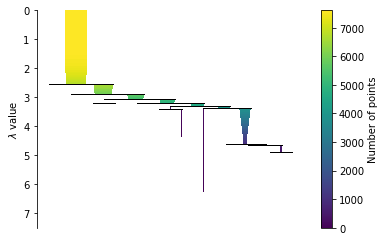

In [45]:
og2 = np.array(og) 
svm_ = return_hdbscansvm(og2, new_v['text'], clust_size = 25, samp_size = 25, svmx = True, clust_metric = 'manhattan')

make_graph(og2, svm_[0]['text'], svm_[1], colors = "Inferno", PCA = True)
#X1 = og
%matplotlib inline
svm_[2].condensed_tree_.plot(select_clusters = False)

In [97]:
sub = svm_[0][svm_[0][5] == 1]
for i in sub['text']:
    print(i)

(' broke glass', 5)
(' gained weight', 5)
(' doing laundry laundromat was closed', 5)
(' did yoga months doing', 5)
(' laundry machine broke', 5)
(' carrying supplies', 5)
(' landlord cleaning arrangements', 5)
(' bath', 5)
(' cleaning apartment disaster', 5)
(' apartment searching', 5)
(' prepping floor tile', 5)
(' door room fell hinges', 5)
(' tons household chores', 5)
(' cleaning mold basement', 5)
(' had workout', 5)
(' had workout', 5)
(' had workout', 5)
(' meditation session nap', 5)
(' workout time week', 5)
(' workout', 5)
(' went hair salon', 5)
(' crafting', 5)
(' took bath', 5)
(' completed chore cleaning garage', 5)
(' relaxing couch doing chores work', 5)
(' went gym', 5)
(' hours lifting weights', 5)
(' exercise hours', 5)
(' got furniture delivered', 5)
(' had workout', 5)
(' completed workout feel', 5)
(' exercised did bonus stair runs workout', 5)
(' worked filling aquarium set', 5)
(' meditated', 5)
(' took bath', 5)
(' workout', 5)
(' workout gym pushed', 5)
(' wo

In [58]:
a = new_v[['BTEMA', 'pID', 'text']].reset_index(drop = True)
b =  pd.DataFrame(og).reset_index(drop = True)
sub_total = pd.concat([a, b], axis = 1)
sub_total['entry_type'] = svm_[1]
sub_total = sub_total.sort_values(by = '1', axis=0)
sub_total
#sub_total.to_csv('/users/madke/documents/090820_aapecsdims4.csv')

,BTEMA,pID,text,0,1,2,3,entry_type
3937,2018-05-02 09:16:43,308,frustration,0.277629,-0.974544,0.041366,-0.348729,7
6036,2017-07-14 13:41:32,173,tension,0.449894,-0.972657,-0.175057,0.092575,7
6396,2017-08-17 09:25:37,202,annoyance allergies,0.543667,-0.971545,-0.091270,0.193105,7
6998,2016-10-24 11:23:06,74,headaches,0.693868,-0.971205,-0.116519,0.422634,7
942,2018-06-07 20:52:40,330,chitchat,0.055259,-0.970211,0.381258,-0.737595,11
4441,2018-04-20 22:18:45,298,intolerance,0.203518,-0.969848,-0.258700,-0.256259,2
2678,2017-05-18 14:57:06,164,nagging,0.312071,-0.963891,-0.013278,-0.521231,2
7106,2017-07-23 11:06:13,182,migraine,0.729995,-0.961918,-0.385021,0.474958,7
7105,2017-07-26 11:44:38,182,migraine,0.729995,-0.961918,-0.385021,0.474958,7
7103,2018-03-03 15:59:59,278,migraine,0.729995,-0.961918,-0.385021,0.474958,7


In [43]:
dice = range(0,12)
for_tatyana = []
for i in dice:
    temp = svm_[0][svm_[0][i] == 1]
    res = temp['text'].sample(n=15, random_state=3)
    res = res.reset_index(drop = True)
    for_tatyana.append(res)
    
    
for j, i in enumerate(for_tatyana):
    print('\n')
    print('TOPIC' + ' ' + str(j) + '\n')
    for n in i:
        print(n)



TOPIC 0

(' had nap', 0)
(' slept', 0)
(' walked', 0)
(' nap', 0)
(' prayed', 0)
(' read bed going sleep', 0)
(' spent minutes catching husband morning', 0)
(' slept', 0)
(' grandbaby is sleeping tonight hes', 0)
(' took nap', 0)
(' night sleep', 0)
(' night sleeping son', 0)
(' took hour nap', 0)
(' took nap had nightmares', 0)
(' missed call nap personnin recovery reached', 0)


TOPIC 1

(' walking dog', 1)
(' bought shirt', 1)
(' squirrel was interacting eating apple', 1)
(' walked leash dog woods', 1)
(' cuddled dog', 1)
(' stomach is starting feel bit hoping peanut butter', 1)
(' cat love', 1)
(' cat', 1)
(' dog ate fertilizer', 1)
(' curdles', 1)
(' held cat', 1)
(' got tour steel plant', 1)
(' took dog walk', 1)
(' played cat', 1)
(' relaxed bed', 1)


TOPIC 2

(' ex', 2)
(' fight parenting', 2)
(' stress mom babysitting feel', 2)
(' hung gf', 2)
(' frustrated lack ability jiu jitsu', 2)
(' had sex', 2)
(' time girlfriend', 2)
(' ejaculate masturbating', 2)
(' time girlfriend'